In [1]:
import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Read Dataset

In [2]:
df_train = pd.read_csv("health_train.csv")
df_train

<IPython.core.display.Javascript object>

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
2495,31.058051,male,27.555148,no,southeast,4,5889.103901
2496,36.833818,male,30.322446,no,northeast,3,6788.534095
2497,56.000000,female,36.179587,no,northwest,2,12401.746575
2498,49.000000,male,36.429614,no,northwest,3,10376.294629


In [3]:
df_test = pd.read_csv("health_test.csv")
df_test

<IPython.core.display.Javascript object>

,age,sex,bmi,smoker,region,children
0,39.296556,male,29.978109,no,northwest,4
1,40.367560,female,27.927669,no,southeast,5
2,32.881563,male,41.576865,no,southwest,5
3,62.000000,female,30.495000,no,northwest,2
4,32.476173,male,30.322774,yes,northeast,4
5,22.317659,male,32.305187,no,northeast,5
6,46.160394,male,34.097296,no,northwest,3
7,39.474347,male,25.238490,no,southeast,5
8,41.551239,male,31.214778,no,southeast,5
9,19.000000,male,25.555000,no,northwest,0


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2500 non-null   float64
 1   sex       2500 non-null   object 
 2   bmi       2500 non-null   float64
 3   smoker    2500 non-null   object 
 4   region    2500 non-null   object 
 5   children  2500 non-null   int64  
 6   charges   2500 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 136.8+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       451 non-null    float64
 1   sex       451 non-null    object 
 2   bmi       451 non-null    float64
 3   smoker    451 non-null    object 
 4   region    451 non-null    object 
 5   children  451 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 21.3+ KB


In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2500.0,39.003033,12.264536,18.0000,28.845667,39.350208,48.688741,64.00000
bmi,2500.0,30.575497,5.390169,15.9600,26.717647,30.200000,34.046166,53.13000
children,2500.0,2.488400,1.707346,0.0000,1.000000,2.000000,4.000000,5.00000
charges,2500.0,12679.311518,10593.270485,1121.8739,5612.780878,9455.047274,14440.628060,63770.42801


In [7]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,451.0,38.806482,11.789015,18.0,30.000000,39.000000,48.000000,64.00
bmi,451.0,30.833082,5.538067,17.8,26.733148,30.322774,34.181785,47.74
children,451.0,2.556541,1.738012,0.0,1.000000,3.000000,4.000000,5.00


In [8]:
df_train.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [9]:
df_test.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
dtype: int64

In [10]:
df_train.duplicated().sum()

0

In [11]:
df_train = df_train.round({"age": 0, "bmi": 2})
df_train

,age,sex,bmi,smoker,region,children,charges
0,21.0,male,25.74,no,northeast,2,3279.868550
1,37.0,female,25.74,yes,southeast,3,21454.494239
2,18.0,male,30.03,no,southeast,1,1720.353700
3,37.0,male,30.68,no,northeast,3,6801.437542
4,58.0,male,32.01,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
2495,31.0,male,27.56,no,southeast,4,5889.103901
2496,37.0,male,30.32,no,northeast,3,6788.534095
2497,56.0,female,36.18,no,northwest,2,12401.746575
2498,49.0,male,36.43,no,northwest,3,10376.294629


In [12]:
df_test = df_test.round({"age": 0, "bmi": 2})
df_test

,age,sex,bmi,smoker,region,children
0,39.0,male,29.98,no,northwest,4
1,40.0,female,27.93,no,southeast,5
2,33.0,male,41.58,no,southwest,5
3,62.0,female,30.50,no,northwest,2
4,32.0,male,30.32,yes,northeast,4
5,22.0,male,32.31,no,northeast,5
6,46.0,male,34.10,no,northwest,3
7,39.0,male,25.24,no,southeast,5
8,42.0,male,31.21,no,southeast,5
9,19.0,male,25.56,no,northwest,0


In [13]:
for col in df_train.select_dtypes('object').columns:
    print(f"{col:<20}:", df_train[col].nunique())

sex                 : 2
smoker              : 2
region              : 4


In [14]:
for col in df_test.select_dtypes('object').columns:
    print(f"{col:<20}:", df_test[col].nunique())

sex                 : 2
smoker              : 2
region              : 4


<IPython.core.display.Javascript object>

<AxesSubplot:>

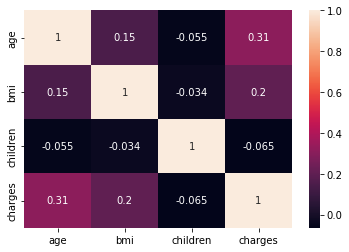

In [15]:
sns.heatmap(df_train.corr(), annot =True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

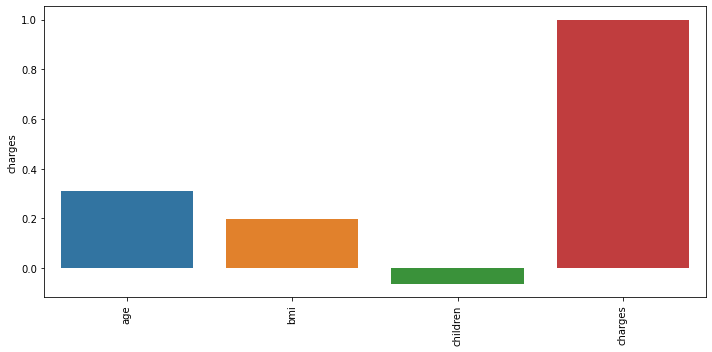

In [16]:
plt.figure(figsize = (10,5))
sns.barplot(x = df_train.corr()["charges"].index, y = df_train.corr()["charges"])
plt.xticks(rotation=90)
plt.tight_layout();

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='age'>

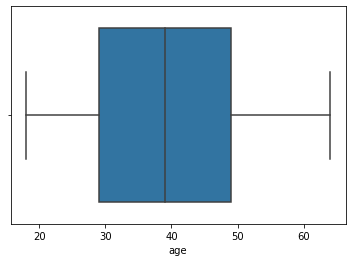

In [17]:
sns.boxplot(df_train.age)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='bmi'>

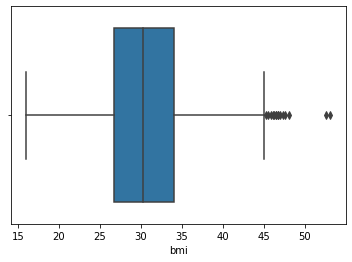

In [18]:
sns.boxplot(df_train.bmi)

In [19]:
df_train[df_train.bmi<45]

,age,sex,bmi,smoker,region,children,charges
0,21.0,male,25.74,no,northeast,2,3279.868550
1,37.0,female,25.74,yes,southeast,3,21454.494239
2,18.0,male,30.03,no,southeast,1,1720.353700
3,37.0,male,30.68,no,northeast,3,6801.437542
4,58.0,male,32.01,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
2495,31.0,male,27.56,no,southeast,4,5889.103901
2496,37.0,male,30.32,no,northeast,3,6788.534095
2497,56.0,female,36.18,no,northwest,2,12401.746575
2498,49.0,male,36.43,no,northwest,3,10376.294629


In [20]:
df_train = df_train[df_train.bmi<45]
df_train

,age,sex,bmi,smoker,region,children,charges
0,21.0,male,25.74,no,northeast,2,3279.868550
1,37.0,female,25.74,yes,southeast,3,21454.494239
2,18.0,male,30.03,no,southeast,1,1720.353700
3,37.0,male,30.68,no,northeast,3,6801.437542
4,58.0,male,32.01,no,southeast,1,11946.625900
...,...,...,...,...,...,...,...
2495,31.0,male,27.56,no,southeast,4,5889.103901
2496,37.0,male,30.32,no,northeast,3,6788.534095
2497,56.0,female,36.18,no,northwest,2,12401.746575
2498,49.0,male,36.43,no,northwest,3,10376.294629


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='children'>

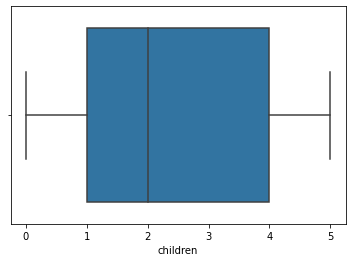

In [21]:
sns.boxplot(df_train.children)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

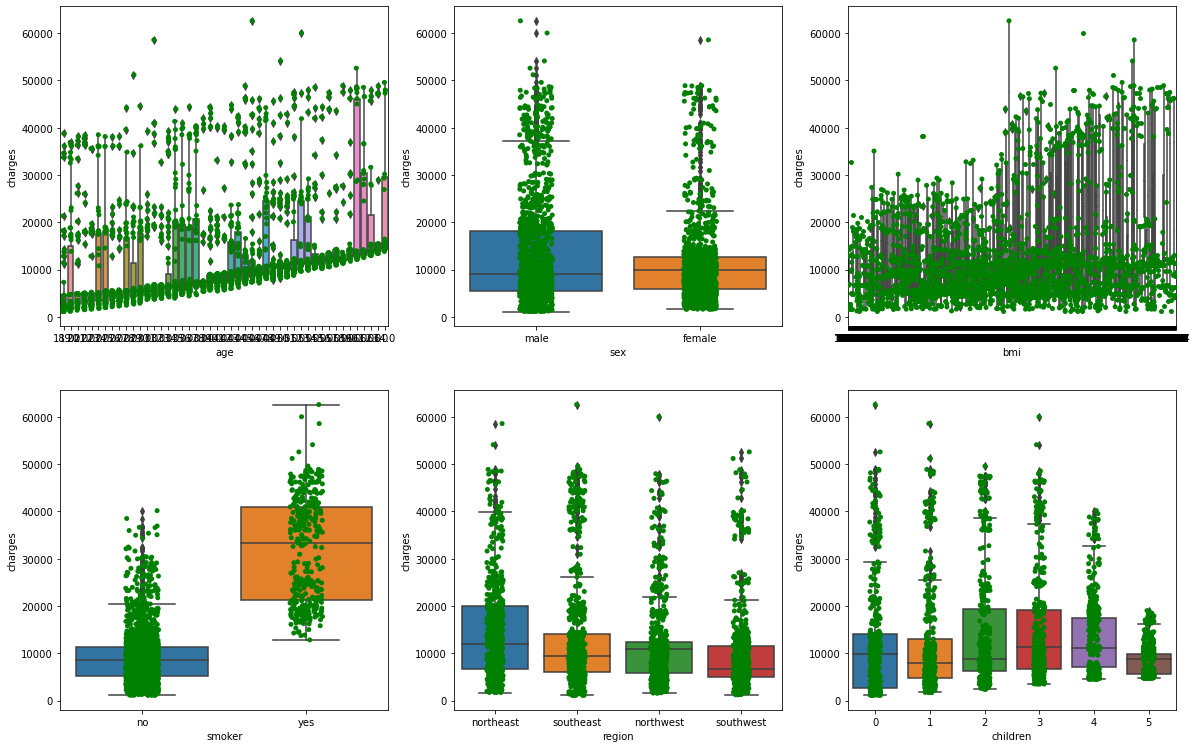

In [22]:
index = 0
plt.figure(figsize=(20,20))
for feature in df_train.columns:
    if feature != "charges":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x=feature, y='charges', data=df_train)
        sns.stripplot(x=feature, y='charges', data=df_train, color= "g")

In [23]:
# df_train.corr()["charges"].drop("charges").sort_values().plot.barh()

In [24]:
# sns.pairplot(df_train, hue = "charges")

# DATA Preprocessing

In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
X=df_train.drop("charges", axis=1)
y=df_train.charges

In [27]:
cat = X.select_dtypes("object").columns
cat

Index(['sex', 'smoker', 'region'], dtype='object')

In [28]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,age,sex,bmi,smoker,region,children
0,21.0,1.0,25.74,0.0,0.0,2
1,37.0,0.0,25.74,1.0,2.0,3
2,18.0,1.0,30.03,0.0,2.0,1
3,37.0,1.0,30.68,0.0,0.0,3
4,58.0,1.0,32.01,0.0,2.0,1


In [29]:
enc = OrdinalEncoder()
df_test[cat] = enc.fit_transform(df_test[cat])
df_test.head()

,age,sex,bmi,smoker,region,children
0,39.0,1.0,29.98,0.0,1.0,4
1,40.0,0.0,27.93,0.0,2.0,5
2,33.0,1.0,41.58,0.0,3.0,5
3,62.0,0.0,30.50,0.0,1.0,2
4,32.0,1.0,30.32,1.0,0.0,4


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (1987, 6)
Train target shape   :  (1987,)
Test features shape  :  (497, 6)
Test target shape    :  (497,)


In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [32]:
def train_val(model, X_train, y_train, X_test, y_test, i):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
     i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

## 1. DecisionTree

In [33]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [34]:
DT_model = DecisionTreeRegressor(random_state=101)
DT_model.fit(X_train, y_train)
train_val(DT_model, X_train, y_train, X_test, y_test, "dt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,dt_train,dt_test
R2,0.999999,7.668427e-01
mae,0.375177,2.095763e+03
mse,75.505536,2.716860e+07
rmse,8.689392,5.212351e+03


### CV

In [35]:
from sklearn.model_selection import cross_validate, cross_val_score
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_r2                             7.679803e-01
test_neg_mean_absolute_error       -1.885947e+03
test_neg_mean_squared_error        -2.411458e+07
test_neg_root_mean_squared_error   -4.882828e+03
dtype: float64

### GridSearch for DT

In [36]:
param_grid = {"splitter":["best", "random"],
            "max_depth": [None, 4, 5, 6, 7, 8],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6],
             "min_samples_split": [2, 3, 5, 6, 7]}

In [37]:
model = DecisionTreeRegressor(random_state=101)
dt_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [38]:
dt_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 5, 6, 7],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [39]:
dt_model.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_split=5, random_state=101)

In [40]:
dt_model.best_params_

{'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [41]:
dt_model.best_score_ 

-4099.773566633099

In [42]:
dt = train_val(dt_model, X_train, y_train, X_test, y_test, "dt")
dt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,dt_train,dt_test
R2,8.857423e-01,8.651530e-01
mae,1.919268e+03,2.159470e+03
mse,1.244411e+07,1.571302e+07
rmse,3.527622e+03,3.963965e+03


### Feature İmportance

In [43]:
model = DecisionTreeRegressor(random_state=101, max_depth=8, min_samples_leaf=6, min_samples_split=2, splitter="best")
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=6, random_state=101)

In [44]:
model.feature_importances_

array([0.09894891, 0.00492231, 0.16727688, 0.63879405, 0.03682074,
       0.0532371 ])

In [45]:
imp_feats = pd.DataFrame(index=X.columns, data=model.feature_importances_,columns=['dt_Importance'])
dt_imp_feats = imp_feats.sort_values('dt_Importance')
dt_imp_feats

<IPython.core.display.Javascript object>

,dt_Importance
sex,0.004922
region,0.036821
children,0.053237
age,0.098949
bmi,0.167277
smoker,0.638794


## 2. RF

In [46]:
from sklearn.ensemble import RandomForestRegressor

In [47]:
rf_model = RandomForestRegressor(random_state=101)
rf_model.fit(X_train,y_train)
train_val(rf_model, X_train, y_train, X_test, y_test, "rf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,rf_train,rf_test
R2,9.820728e-01,8.677121e-01
mae,6.499691e+02,1.825423e+03
mse,1.952494e+06,1.541482e+07
rmse,1.397317e+03,3.926171e+03


### CV

In [48]:
from sklearn.model_selection import cross_validate, cross_val_score
model = RandomForestRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

<IPython.core.display.Javascript object>

test_r2                             8.591974e-01
test_neg_mean_absolute_error       -1.769465e+03
test_neg_mean_squared_error        -1.454113e+07
test_neg_root_mean_squared_error   -3.796287e+03
dtype: float64

### GridSearch for RF

In [49]:
param_grid = {"n_estimators":[200, 500],
              "max_depth": [None, 4, 5],
              "min_samples_leaf": [1, 2],
              "min_samples_split": [2, 3],
              "max_features":['auto', len(df_train.columns)/3]}


In [50]:
model = RandomForestRegressor(random_state=101)
rf_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=5,
                          n_jobs = -1)

In [51]:
rf_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=101), n_jobs=-1,
             param_grid={'max_depth': [None, 4, 5],
                         'max_features': ['auto', 2.3333333333333335],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 500]},
             scoring='neg_root_mean_squared_error')

In [52]:
rf_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [53]:
rf_model.best_score_

-3769.3980166095935

In [54]:
rf = train_val(rf_model, X_train, y_train, X_test, y_test, "rf")
rf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,rf_train,rf_test
R2,9.572341e-01,8.782856e-01
mae,9.818339e+02,1.778523e+03
mse,4.657743e+06,1.418275e+07
rmse,2.158180e+03,3.765999e+03


### Feature İmportance

In [55]:
model = RandomForestRegressor(random_state=101, max_depth=None, max_features= "auto", min_samples_leaf = 1, min_samples_split=3, n_estimators= 200)
model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=200, random_state=101)

In [56]:
model.feature_importances_

array([0.11283384, 0.00676737, 0.19380395, 0.58458147, 0.03705097,
       0.06496239])

In [57]:
imp_feats = pd.DataFrame(index=X.columns, data=model.feature_importances_,columns=['rf_Importance'])
rf_imp_feats = imp_feats.sort_values('rf_Importance')
rf_imp_feats

<IPython.core.display.Javascript object>

,rf_Importance
sex,0.006767
region,0.037051
children,0.064962
age,0.112834
bmi,0.193804
smoker,0.584581


## 3. Adaboost

In [58]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [59]:
ada_model = AdaBoostRegressor(random_state=101, n_estimators=50, base_estimator=DecisionTreeRegressor(max_depth=3))

In [60]:
ada_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  random_state=101)

In [61]:
train_val(ada_model, X_train, y_train, X_test, y_test, "ada")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,ada_train,ada_test
R2,6.044324e-01,6.222952e-01
mae,6.061597e+03,6.125617e+03
mse,4.308231e+07,4.401198e+07
rmse,6.563712e+03,6.634152e+03


### CV

In [62]:
from sklearn.model_selection import cross_validate, cross_val_score
model = AdaBoostRegressor(random_state=101, n_estimators=50, base_estimator=DecisionTreeRegressor(max_depth=3))
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

test_r2                             5.819264e-01
test_neg_mean_absolute_error       -5.822287e+03
test_neg_mean_squared_error        -4.420101e+07
test_neg_root_mean_squared_error   -6.607132e+03
dtype: float64

### GridSearchCV for Adaboost

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {"n_estimators":[50, 100, 200, 300, 500],
              "learning_rate":[0.1, 0.5, 0.8, 1],
              "loss": ["linear", "square"]  
            }

In [65]:
model = AdaBoostRegressor(random_state=101, n_estimators=50, base_estimator=DecisionTreeRegressor(max_depth=3))
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [66]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                                         random_state=101),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.8, 1],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_root_mean_squared_error')

In [67]:
grid_model.best_params_

{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 50}

In [68]:
grid_model.best_score_ 

-5083.711540778915

In [69]:
ada = train_val(grid_model, X_train, y_train, X_test, y_test,"ada")
ada

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,ada_train,ada_test
R2,7.854858e-01,8.000948e-01
mae,3.501636e+03,3.556995e+03
mse,2.336331e+07,2.329391e+07
rmse,4.833560e+03,4.826376e+03


### Feature İmportance

In [70]:
model = AdaBoostRegressor(random_state=101, n_estimators=50, loss = "linear", learning_rate=0.1)
model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, random_state=101)

In [71]:
model.feature_importances_

array([8.77151151e-02, 1.04981171e-04, 1.51891348e-01, 6.85049574e-01,
       4.05458216e-02, 3.46931606e-02])

In [72]:
imp_feats = pd.DataFrame(index=X.columns, data=model.feature_importances_,columns=['ada_Importance'])
ada_imp_feats = imp_feats.sort_values('ada_Importance')
ada_imp_feats

<IPython.core.display.Javascript object>

,ada_Importance
sex,0.000105
children,0.034693
region,0.040546
age,0.087715
bmi,0.151891
smoker,0.685050


## 4. GradientBoosting

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
grad_model = GradientBoostingRegressor(random_state=101)

In [75]:
grad_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=101)

In [76]:
train_val(grad_model, X_train, y_train, X_test, y_test, "gb")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,gb_train,gb_test
R2,8.837678e-01,8.644984e-01
mae,1.929620e+03,2.095346e+03
mse,1.265916e+07,1.578929e+07
rmse,3.557971e+03,3.973574e+03


### CV 

In [77]:
model = GradientBoostingRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

test_r2                             8.452153e-01
test_neg_mean_absolute_error       -2.137399e+03
test_neg_mean_squared_error        -1.600855e+07
test_neg_root_mean_squared_error   -3.978633e+03
dtype: float64

### GridSearchCV for GradientBoosting

In [78]:
param_grid = {"n_estimators":[100,300], "subsample":[0.8, 1], "max_features" : [None, 2, 3, 4],
            "learning_rate": [0.01, 0.1, 1], 'max_depth':[2,3]}

In [79]:
model = GradientBoostingRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [80]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1], 'max_depth': [2, 3],
                         'max_features': [None, 2, 3, 4],
                         'n_estimators': [100, 300], 'subsample': [0.8, 1]},
             scoring='neg_root_mean_squared_error')

In [81]:
grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 3,
 'n_estimators': 300,
 'subsample': 0.8}

In [82]:
grid_model.best_score_

-3905.9812252473844

In [83]:
gb = train_val(grid_model, X_train, y_train, X_test, y_test, "gb")
gb

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,gb_train,gb_test
R2,9.164106e-01,8.663950e-01
mae,1.618265e+03,2.045804e+03
mse,9.103946e+06,1.556829e+07
rmse,3.017275e+03,3.945668e+03


### Feature İmportance

In [84]:
model = GradientBoostingRegressor(random_state=101, max_depth=3, learning_rate = 0.1, max_features=2, n_estimators=300, subsample=0.8)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_features=2, n_estimators=300, random_state=101,
                          subsample=0.8)

In [85]:
model.feature_importances_

array([0.1238714 , 0.01506926, 0.14338896, 0.62152202, 0.04071647,
       0.05543189])

In [86]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['grad_Importance'])
grad_imp_feats = imp_feats.sort_values('grad_Importance')
grad_imp_feats

<IPython.core.display.Javascript object>

,grad_Importance
sex,0.015069
region,0.040716
children,0.055432
age,0.123871
bmi,0.143389
smoker,0.621522


### 3. XGBRegressor

In [87]:
from xgboost import XGBRegressor

In [88]:
xgb_model = XGBRegressor(random_state=101, objective="reg:squarederror")

In [89]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
train_val(xgb_model, X_train, y_train, X_test, y_test, "xgb")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,xgb_train,xgb_test
R2,0.991788,8.507968e-01
mae,544.631950,2.137163e+03
mse,894366.930376,1.738587e+07
rmse,945.709750,4.169637e+03


### CV

In [91]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

<IPython.core.display.Javascript object>

test_r2                             8.400741e-01
test_neg_mean_absolute_error       -2.107104e+03
test_neg_mean_squared_error        -1.665973e+07
test_neg_root_mean_squared_error   -4.075475e+03
dtype: float64

### GridSearch for XGBRegressor

In [92]:
param_grid = {"n_estimators":[100,500],'max_depth':[3,5,6], "learning_rate": [0.05, 0.1, 0.3],
             "subsample":[0.8, 1], "colsample_bytree":[0.5, 1]}

In [93]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [94]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=101, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
 

In [95]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 6,
 'n_estimators': 100,
 'subsample': 0.8}

In [96]:
grid_model.best_score_

-3798.2998230546996

In [97]:
xgb = train_val(grid_model, X_train, y_train, X_test, y_test, "xgb")
xgb

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,xgb_train,xgb_test
R2,9.369008e-01,8.837886e-01
mae,1.289890e+03,1.758092e+03
mse,6.872300e+06,1.354151e+07
rmse,2.621507e+03,3.679879e+03


### Feature İmportance

In [104]:
model = XGBRegressor(random_state=101, objective="reg:squarederror", learning_rate=0.05, colsample_bytree= 1, max_depth=6, subsample=0.8, n_estimators=100)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [105]:
model.feature_importances_

array([0.01295264, 0.00473556, 0.01926377, 0.93189985, 0.01539059,
       0.01575762], dtype=float32)

In [106]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['xgb_Importance'])
xgb_imp_feats = imp_feats.sort_values('xgb_Importance')
xgb_imp_feats

<IPython.core.display.Javascript object>

,xgb_Importance
sex,0.004736
age,0.012953
region,0.015391
children,0.015758
bmi,0.019264
smoker,0.931900


In [107]:
pd.concat([dt, rf, ada, gb, xgb], axis=1)

<IPython.core.display.Javascript object>

,dt_train,dt_test,rf_train,rf_test,ada_train,ada_test,gb_train,gb_test,xgb_train,xgb_test
R2,8.857423e-01,8.651530e-01,9.572341e-01,8.782856e-01,7.854858e-01,8.000948e-01,9.164106e-01,8.663950e-01,9.369008e-01,8.837886e-01
mae,1.919268e+03,2.159470e+03,9.818339e+02,1.778523e+03,3.501636e+03,3.556995e+03,1.618265e+03,2.045804e+03,1.289890e+03,1.758092e+03
mse,1.244411e+07,1.571302e+07,4.657743e+06,1.418275e+07,2.336331e+07,2.329391e+07,9.103946e+06,1.556829e+07,6.872300e+06,1.354151e+07
rmse,3.527622e+03,3.963965e+03,2.158180e+03,3.765999e+03,4.833560e+03,4.826376e+03,3.017275e+03,3.945668e+03,2.621507e+03,3.679879e+03


In [108]:
pd.concat([dt_imp_feats, rf_imp_feats, ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

<IPython.core.display.Javascript object>

,dt_Importance,rf_Importance,ada_Importance,grad_Importance,xgb_Importance
sex,0.004922,0.006767,0.000105,0.015069,0.004736
region,0.036821,0.037051,0.040546,0.040716,0.015391
children,0.053237,0.064962,0.034693,0.055432,0.015758
age,0.098949,0.112834,0.087715,0.123871,0.012953
bmi,0.167277,0.193804,0.151891,0.143389,0.019264
smoker,0.638794,0.584581,0.685050,0.621522,0.931900


### Final Model

In [109]:
X=df_train.drop(columns="charges")
y=df_train.charges

cat = X.select_dtypes("object").columns
cat

enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,age,sex,bmi,smoker,region,children
0,21.0,1.0,25.74,0.0,0.0,2
1,37.0,0.0,25.74,1.0,2.0,3
2,18.0,1.0,30.03,0.0,2.0,1
3,37.0,1.0,30.68,0.0,0.0,3
4,58.0,1.0,32.01,0.0,2.0,1


In [110]:
final_model = XGBRegressor(random_state=101, objective="reg:squarederror", learning_rate=0.05, colsample_bytree= 1, max_depth=6, subsample=1, n_estimators=100)

In [111]:
final_model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=101,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
predictions = final_model.predict(df_test)
predictions = pd.DataFrame(predictions)

<IPython.core.display.Javascript object>

In [113]:
predictions

,0
0,8588.951172
1,9175.046875
2,6487.980469
3,15504.743164
4,36455.687500
5,6630.572266
6,10357.153320
7,9455.028320
8,9967.871094
9,1925.946655


In [114]:
predictions.to_csv("C93077.csv", index=False)